In [1]:
import sys
sys.path.append('/Users/saluev/Work/bioinf_homework/')

In [2]:
! ln -s /Users/saluev/Downloads/minimap2/minimap2 minimap2

In [4]:
! ./minimap2 --help

Usage: minimap2 [options] <target.fa>|<target.idx> [query.fa] [...]
Options:
  Indexing:
    -H           use homopolymer-compressed k-mer (preferrable for PacBio)
    -k INT       k-mer size (no larger than 28) [15]
    -w INT       minimizer window size [10]
    -I NUM       split index for every ~NUM input bases [4G]
    -d FILE      dump index to FILE []
  Mapping:
    -f FLOAT     filter out top FLOAT fraction of repetitive minimizers [0.0002]
    -g NUM       stop chain enlongation if there are no minimizers in INT-bp [5000]
    -G NUM       max intron length (effective with -xsplice; changing -r) [200k]
    -F NUM       max fragment length (effective with -xsr or in the fragment mode) [800]
    -r NUM[,NUM] chaining/alignment bandwidth and long-join bandwidth [500,20000]
    -n INT       minimal number of minimizers on a chain [3]
    -m INT       minimal chaining score (matching bases minus log gap penalty) [40]
    -X           skip self and dual mappings (for the all-vs-all m

In [5]:
! ./minimap2 -x map-ont -d reference.mmi /Users/saluev/Downloads/3/reference.fasta

[M::mm_idx_gen::0.233*0.99] collected minimizers
[M::mm_idx_gen::0.268*1.24] sorted minimizers
[M::main::0.456*1.07] loaded/built the index for 1 target sequence(s)
[M::mm_idx_stat] kmer size: 15; skip: 10; is_hpc: 0; #seq: 1
[M::mm_idx_stat::0.468*1.06] distinct minimizers: 838533 (98.18% are singletons); average occurrences: 1.034; average spacing: 5.352; total length: 4639675
[M::main] Version: 2.24-r1122
[M::main] CMD: ./minimap2 -x map-ont -d reference.mmi /Users/saluev/Downloads/3/reference.fasta
[M::main] Real time: 0.512 sec; CPU: 0.516 sec; Peak RSS: 0.065 GB


# Риды Oxford Nanopore

In [6]:
! ./minimap2 -a reference.mmi /Users/saluev/Downloads/3/ONT_2D.fastq.gz > onp.sam

[M::main::0.200*0.81] loaded/built the index for 1 target sequence(s)
[M::mm_mapopt_update::0.232*0.79] mid_occ = 11
[M::mm_idx_stat] kmer size: 15; skip: 10; is_hpc: 0; #seq: 1
[M::mm_idx_stat::0.250*0.79] distinct minimizers: 838533 (98.18% are singletons); average occurrences: 1.034; average spacing: 5.352; total length: 4639675
[M::worker_pipeline::34.944*2.38] mapped 30810 sequences
[M::main] Version: 2.24-r1122
[M::main] CMD: ./minimap2 -a reference.mmi /Users/saluev/Downloads/3/ONT_2D.fastq.gz
[M::main] Real time: 34.972 sec; CPU: 83.321 sec; Peak RSS: 1.020 GB


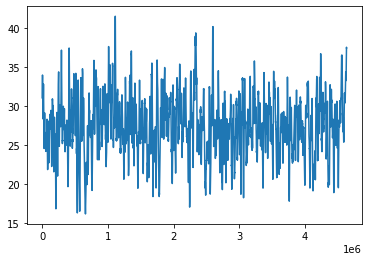

{'gi|48994873|gb|U00096.2|': 27.498397301880562}

In [2]:
from ngs.ngs_2.coverage import evaluate_alignment_coverage
coverage = evaluate_alignment_coverage(
    reference="/Users/saluev/Downloads/3/reference.fasta", 
    alignment="onp.sam",
    window=10000,
)
coverage

In [3]:
import pandas as pd
from ngs.ngs_2.mismatch_frequency import evaluate_mismatch_frequency
stats = evaluate_mismatch_frequency(
    reference="/Users/saluev/Downloads/3/reference.fasta", 
    alignment="onp.sam",
    homopolymer_length_threshold=4,
)
print(f"Средний процент ошибок в ридах: {stats.avg_error_rate*100:.2f}%")
print(f"Средняя длина вставки: {stats.avg_insertion_length:.2f}")
print(f"Средняя длина делеции: {stats.avg_deletion_length:.2f}")
print(f"Процент вставок рядом с гомополимерными участками: {stats.homopolymer_close_insertions_rate*100:.2f}%")
print(f"Среднее качество вставленного нуклеотида: {stats.avg_insertion_quality:.2f}")
print(f"Среднее качество заменённого нуклеотида: {stats.avg_mismatch_quality:.2f}")
pd.DataFrame(data=[
    [stats.replacement_count[n1, n2] if n1 != n2 else "—" for n2 in list("ACGT") + [""]]
    for n1 in list("ACGT") + [""]
], index=list("ACGT_"), columns=list("ACGT_"))

Средний процент ошибок в ридах: 7.91%
Средняя длина вставки: 1.79
Средняя длина делеции: 1.89
Процент вставок рядом с гомополимерными участками: 4.66%
Среднее качество вставленного нуклеотида: 10.99
Среднее качество заменённого нуклеотида: 8.32


,A,C,G,T,_
A,—,113177,368870,105572,1609768
C,137383,—,85186,341223,1539123
G,320153,91513,—,126808,1560890
T,107997,373144,111626,—,1606626
_,398813,378428,394692,394839,—


# Риды PacBio

In [7]:
! ./minimap2 -a reference.mmi /Users/saluev/Downloads/3/pacbio_40x.fq.gz > pacbio.sam

[M::main::0.116*0.99] loaded/built the index for 1 target sequence(s)
[M::mm_mapopt_update::0.129*0.99] mid_occ = 11
[M::mm_idx_stat] kmer size: 15; skip: 10; is_hpc: 0; #seq: 1
[M::mm_idx_stat::0.139*0.99] distinct minimizers: 838533 (98.18% are singletons); average occurrences: 1.034; average spacing: 5.352; total length: 4639675
[M::worker_pipeline::101.998*2.30] mapped 41447 sequences
[M::main] Version: 2.24-r1122
[M::main] CMD: ./minimap2 -a reference.mmi /Users/saluev/Downloads/3/pacbio_40x.fq.gz
[M::main] Real time: 102.058 sec; CPU: 234.298 sec; Peak RSS: 1.780 GB


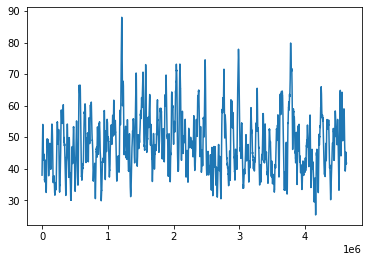

{'gi|48994873|gb|U00096.2|': 47.9792664401566}

In [4]:
from ngs.ngs_2.coverage import evaluate_alignment_coverage
coverage = evaluate_alignment_coverage(
    reference="/Users/saluev/Downloads/3/reference.fasta", 
    alignment="pacbio.sam",
    window=10000,
)
coverage

In [5]:
import pandas as pd
from ngs.ngs_2.mismatch_frequency import evaluate_mismatch_frequency
stats = evaluate_mismatch_frequency(
    reference="/Users/saluev/Downloads/3/reference.fasta", 
    alignment="pacbio.sam",
    homopolymer_length_threshold=4,
)
print(f"Средний процент ошибок в ридах: {stats.avg_error_rate*100:.2f}%")
print(f"Средняя длина вставки: {stats.avg_insertion_length:.2f}")
print(f"Средняя длина делеции: {stats.avg_deletion_length:.2f}")
print(f"Процент вставок рядом с гомополимерными участками: {stats.homopolymer_close_insertions_rate*100:.2f}%")
print(f"Среднее качество вставленного нуклеотида: {stats.avg_insertion_quality:.2f}")
print(f"Среднее качество заменённого нуклеотида: {stats.avg_mismatch_quality:.2f}")
pd.DataFrame(data=[
    [stats.replacement_count[n1, n2] if n1 != n2 else "—" for n2 in list("ACGT") + [""]]
    for n1 in list("ACGT") + [""]
], index=list("ACGT_"), columns=list("ACGT_"))

Средний процент ошибок в ридах: 13.83%
Средняя длина вставки: 1.54
Средняя длина делеции: 1.20
Процент вставок рядом с гомополимерными участками: 4.00%
Среднее качество вставленного нуклеотида: 6.76
Среднее качество заменённого нуклеотида: 6.57


,A,C,G,T,_
A,—,358444,311578,289459,1443519
C,460943,—,418012,326074,2078481
G,326188,419146,—,454244,2070219
T,289488,312910,363517,—,1439334
_,3673247,4555981,4561115,3659184,—


Видим, что PacBio даёт больше ошибок, но ошибки более равномерно распределены (похожие вероятности замен, похожее качество у вставок и делеций).